# Final Exam

## Nonlinear transforms

### 1.
The polynomial transform of order $Q = 10$ applied to $\mathcal{X}$ of dimension $d = 2$ results
in a $\mathcal{Z}$ space of what dimensionality (not counting the constant coordinate
$x_0 = 1$ or $z_0 = 1$)?

[a] 12

[b] 20

[c] 35

[d] 100

[e] None of the above

The all of the terms of $Q$-th order polynomial are included in $(1 + x_1 + x_2)^Q$. The number of terms is ${}_{Q+2}\mathrm{C}_{2}$ including the constant term. Since we don't count the constant term, the answer is
$${}_{12}\mathrm{C}_2 -1 = \frac{12!}{10! 2!} -1 = 65$$
$(Q+2)(Q+1)/2 -1$ is the formula for degree $Q$.

## Bias and Variance

### 2.
Recall that the average hypothesis $\bar{g}$ was based on training the same model $\mathcal{H}$
on different data sets $\mathcal{D}$ to get $g^{(\mathcal{D})} \in \mathcal{H}$,
and taking the expected value of $g^{(\mathcal{D})}$ w.r.t. $\mathcal{D}$ to get $\bar{g}$.
Which of the following models $\mathcal{H}$ could result in $\bar{g} \notin \mathcal{H}$?

[a] A singleton $\mathcal{H}$ ($\mathcal{H}$ has one hypothesis)

[b] $\mathcal{H}$ is the set of all constant, real-valued hypotheses

[c] $\mathcal{H}$ is the linear regression model

[d] $\mathcal{H}$ is the logistic regression model

[e] None of the above

The form of logistic function is not preserved after integration (or summation). So, [d] is the answer.

## Overfitting

### 3.
Which of the following statements is false?

[a] If there is overfitting, there must be two or more hypotheses that have
different values of $E_\mathrm{in}$.

[b] If there is overfitting, there must be two or more hypotheses that have
different values of $E_\mathrm{out}$.

[c] If there is overfitting, there must be two or more hypotheses that have
different values of $(E_\mathrm{out} − E_\mathrm{in})$.

[d] We can always determine if there is overfitting by comparing the values of
$(E_\mathrm{out} − E_\mathrm{in})$.

[e] We cannot determine overfitting based on one hypothesis only.

[d] is wrong.

### 4.
Which of the following statements is true?

[a] Deterministic noise cannot occur with stochastic noise.

[b] Deterministic noise does not depend on the hypothesis set.

[c] Deterministic noise does not depend on the target function.

[d] Stochastic noise does not depend on the hypothesis set.

[e] Stochastic noise does not depend on the target distribution.

[d] is true statement.

## Regularization

### 5.
The regularized weight $\mathbf{w}_\mathrm{reg}$ is a solution to:
$$\mbox{minimize}\frac{1}{N}\sum_{n=1}^N (\mathbf{w}^\intercal \mathbf{x}_n - y_n)^2
\mbox{ subject to }
\mathbf{w}^\intercal \Gamma^\intercal \Gamma \mathbf{w} \leq C$$
where $\Gamma$ is a matrix.
If $\mathbf{w}_\mathrm{lin}^\intercal \Gamma^\intercal \Gamma \mathbf{w}_\mathrm{lin} \leq C$, where
$\mathbf{w}_{lin}$ is the linear regression solution, then what is $\mathbf{w}_\mathrm{reg}$?

[a] $\mathbf{w}_\mathrm{reg} = \mathbf{w}_\mathrm{lin}$

[b] $\mathbf{w}_\mathrm{reg}= \Gamma \mathbf{w}_\mathrm{lin}$

[c] $\mathbf{w}_\mathrm{reg}= \Gamma^\intercal \Gamma \mathbf{w}_\mathrm{lin}$

[d] $\mathbf{w}_\mathrm{reg}= C \Gamma \mathbf{w}_\mathrm{lin}$

[e] $\mathbf{w}_\mathrm{reg}= C \mathbf{w}_\mathrm{lin}$

$\mathbf{w}_\mathrm{lin}$ satisfies the constraint, so $\mathbf{w}_\mathrm{reg} = \mathbf{w}_\mathrm{lin}$. 

### 6.
Soft-order constraints that regularize polynomial models can be

[a] written as hard-order constraints

[b] translated into augmented error

[c] determined from the value of the VC dimension

[d] used to decrease both $E_\mathrm{in}$ and $E_\mathrm{out}$

[e] None of the above is true

[b] is correct.

## Regularized Linear Regression
We are going to experiment with linear regression for classification on the processed
US Postal Service Zip Code data set from Homework 8. Download the data (extracted
features of intensity and symmetry) for training and testing:

http://www.amlbook.com/data/zip/features.train

http://www.amlbook.com/data/zip/features.test

(the format of each row is: **digit intensity symmetry**). We will train two types
of binary classifiers; one-versus-one (one digit is class $+1$ and another digit is class
$−1$, with the rest of the digits disregarded), and one-versus-all (one digit is class
$+1$ and the rest of the digits are class $−1$). When evaluating $E_\mathrm{in}$ and $E_\mathrm{out}$,
use binary classification error. Implement the regularized least-squares linear regression
for classification that minimizes
$$\frac{1}{N}\sum_{n=1}^N (\mathbf{w}^\intercal \mathbf{z}_n - y_n)^2 + \frac{\lambda}{N}
\mathbf{w}^\intercal \mathbf{w}$$
where $\mathbf{w}$ includes $w_0$.

### 7.
Set $\lambda = 1$ and do not apply a feature transform (i.e., use
$\mathbf{z} = \mathbf{x} = (1,x_1 ,x_2)$).
Which among the following classifiers has the lowest $E_\mathrm{in}$?

[a] 5 versus all

[b] 6 versus all

[c] 7 versus all

[d] 8 versus all

[e] 9 versus all

In [3]:
# download("http://www.amlbook.com/data/zip/features.train", "features.train")
# download("http://www.amlbook.com/data/zip/features.test", "features.test")

training_data = readdlm("features.train")
test_data = readdlm("features.test");

train_features = training_data[:,2:3]
train_labels = training_data[:,1]
test_features = test_data[:,2:3]
test_labels = test_data[:,1]

function n_vs_all(labels, n)
    nlabels = labels[:]
    nlabels[labels .== n] = 1
    nlabels[labels .!= n] = -1
    return nlabels
end

function filter_m_vs_n(features, labels, m, n)
    mids = ifelse(labels .== m, true, false)
    nids = ifelse(labels .== n, true, false)
    mlabels = 1*ones(sum(mids))
    nlabels = -1*ones(sum(nids))
    return [features[mids,:];features[nids,:]], [mlabels; nlabels]
end

function mis_classified_count(points, labels, weights)
    return sum(sign(points*weights) .!= labels)
end

function linear_regression(points, labels; lambda = 0.0)
    return pinv(lambda * eye(size(points,2)) + points'*points)*points'*labels
end

linear_regression (generic function with 1 method)

In [4]:
function question7()
    ein = []
    idxs = 5:9
    features = [ones(length(train_labels)) train_features]
    for i in idxs
        labels = n_vs_all(train_labels, i)
        weights = linear_regression(features, labels, lambda=1.0)
        push!(ein, mis_classified_count(features, labels, weights) / length(labels))
    end
    [idxs ein]
end
question7()

5x2 Array{Any,2}:
 5  0.0762584
 6  0.0910712
 7  0.0884652
 8  0.0743382
 9  0.0883281

### 8.
Now, apply a feature transform $\mathbf{z} = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$, and set $\lambda = 1$.
Which among the following classifiers has the lowest $E_\mathrm{out}$?

[a] 0 versus all

[b] 1 versus all

[c] 2 versus all

[d] 3 versus all

[e] 4 versus all

In [5]:
function question8()
    eout = []
    idxs = 0:4
    features = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], train_features, 2)
    t_features = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], test_features, 2)
    for i in idxs
        labels = n_vs_all(train_labels, i)
        t_labels = n_vs_all(test_labels, i)
        weights = linear_regression(features, labels, lambda=1.0)
        push!(eout, mis_classified_count(t_features, t_labels, weights) / length(t_labels))
    end
    [idxs eout]
end
question8()

5x2 Array{Any,2}:
 0  0.106627 
 1  0.0219233
 2  0.0986547
 3  0.0827105
 4  0.0996512

### 9.
If we compare using the transform versus not using it, and apply that to "0
versus all" through "9 versus all", which of the following statements is correct
for $\lambda = 1$?

[a] Overfitting always occurs when we use the transform.

[b] The transform always improves the out-of-sample performance by at least
5% ($E_\mathrm{out}$ with transform $\leq 0.95 E_\mathrm{out}$ without transform).

[c] The transform does not make any difference in the out-of-sample performance.

[d] The transform always worsens the out-of-sample performance by at least
5%.

[e] The transform improves the out-of-sample performance of "5 versus all",
but by less than 5%.

In [6]:
function question9()
    eout = []
    eout_tr = []
    idxs = 0:9
    
    features = [ones(length(train_labels)) train_features]
    t_features = [ones(length(test_labels)) test_features]
    features_tr = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], train_features, 2)
    t_features_tr = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], test_features, 2)
    for i in idxs
        labels = n_vs_all(train_labels, i)
        t_labels = n_vs_all(test_labels, i)
        # without transform
        weights = linear_regression(features, labels, lambda=1.0)
        push!(eout, mis_classified_count(t_features, t_labels, weights) / length(t_labels))
        # with transform
        weights_tr = linear_regression(features_tr, labels, lambda=1.0)
        push!(eout_tr, mis_classified_count(t_features_tr, t_labels, weights_tr) / length(t_labels))
    end
    [idxs eout eout_tr]
end
question9()

10x3 Array{Any,2}:
 0  0.115097   0.106627 
 1  0.0224215  0.0219233
 2  0.0986547  0.0986547
 3  0.0827105  0.0827105
 4  0.0996512  0.0996512
 5  0.079721   0.0792227
 6  0.0847035  0.0847035
 7  0.0732436  0.0732436
 8  0.0827105  0.0827105
 9  0.0881913  0.0881913

In [7]:
0.079721 >= 0.95 * 0.0792227

true

### 10.
Train the "1 versus 5" classifier with $z = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$ with $\lambda = 0.01$
and $\lambda = 1$. Which of the following statements is correct?

[a] Overfitting occurs (from $\lambda = 1$ to $\lambda = 0.01$).

[b] The two classifiers have the same $E_\mathrm{in}$.

[c] The two classifiers have the same $E_\mathrm{out}$.

[d] When $\lambda$ goes up, both $E_\mathrm{in}$ and $E_\mathrm{out}$ go up.

[e] When $\lambda$ goes up, both $E_\mathrm{in}$ and $E_\mathrm{out}$ go down.

In [8]:
function question10()
    train_feat, train_lab = filter_m_vs_n(train_features, train_labels, 1, 5)
    test_feat, test_lab = filter_m_vs_n(test_features, test_labels, 1, 5)
    
    features_tr = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], train_feat, 2)
    t_features_tr = mapslices(x->[1, x[1], x[2], x[1]*x[2], x[1]^2, x[2]^2], test_feat, 2)

    # with lambda = 0.01
    weights = linear_regression(features_tr, train_lab, lambda=0.01)
    ein1 = mis_classified_count(features_tr, train_lab, weights) / length(train_lab)
    eout1 = mis_classified_count(t_features_tr, test_lab, weights) / length(test_lab)
    # with lambda = 1.0
    weights = linear_regression(features_tr, train_lab, lambda=1.0)
    ein2 = mis_classified_count(features_tr, train_lab, weights) / length(train_lab)
    eout2 = mis_classified_count(t_features_tr, test_lab, weights) / length(test_lab)
    [0.01 ein1 eout1; 1.0 ein2 eout2]
end
question10()

2x3 Array{Float64,2}:
 0.01  0.0044843   0.0283019
 1.0   0.00512492  0.0259434

Overfitting occurs with $\lambda = 0.01$.

## Support Vector Machines

### 11.
Consider the following training set generated from a target function $f : \mathcal{X} \to \{−1,+1\}$
where $\mathcal{X} = \mathbb{R}^2$
$$\begin{eqnarray}
\mathbf{x}_1=(1,0), y_1=-1 \hspace{2em} \mathbf{x}_2&=&(0,1), y_2 = -1 \hspace{2em} \mathbf{x}_3=(0, -1), y_3= -1 \\
\mathbf{x}_4=(-1,0), y_4=+1 \hspace{2em} \mathbf{x}_5&=&(0,2), y_5=+1 \hspace{2em} \mathbf{x}_6=(0,-2),y_6=+1\\
\mathbf{x}_7&=&(-2,0), y_7=+1
\end{eqnarray}$$

Transform this training set into another two-dimensional space $\mathcal{Z}$
$$z_1 = x_2^2 - 2x_1 -1 \hspace{2em} z_2 = x_1^2 - 2x_2 + 1$$

Using geometry (not quadratic programming), what values of $\mathbf{w}$ (without $w_0$)
and $b$ specify the separating plane $\mathbf{w}^\intercal \mathbf{z} + b = 0$ that maximizes
the margin in the $\mathcal{Z}$ space? The values of $w_1, w_2, b$ are:

[a] $−1, 1, −0.5$

[b] $1, −1, −0.5$

[c] $1, 0, −0.5$

[d] $0, 1, −0.5$

[e] None of the above would work.

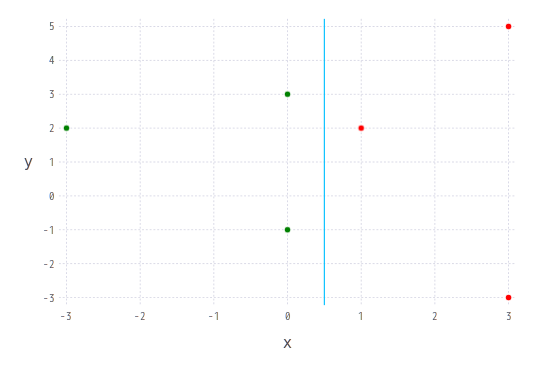

In [2]:
using Gadfly

function question11()
    X = [1 0; 0 1; 0 -1; -1 0; 0 2; 0 -2; -2 0]
    Z = mapslices(x-> [x[2]^2 - 2*x[1] - 1, x[1]^2 - 2*x[2] + 1], X, 2)
    Y = [-1, -1, -1, 1, 1, 1, 1]
    data = [Z Y]
    plot(Scale.y_continuous(minvalue=-1, maxvalue=4),
    layer(x=data[(data[:,3] .== -1),1], y=data[(data[:,3] .== -1),2], Geom.point,
    Theme(default_color=colorant"green")),
    layer(x=data[(data[:,3] .== 1),1], y=data[(data[:,3] .== 1),2], Geom.point,
    Theme(default_color=colorant"red")),
    layer(xintercept=[0.5], Geom.vline))
end
question11()

From the plot, the line is $z_1 = \frac{1}{2}$, or $w_1 = 1, w_2 = 0, b= -0.5$.

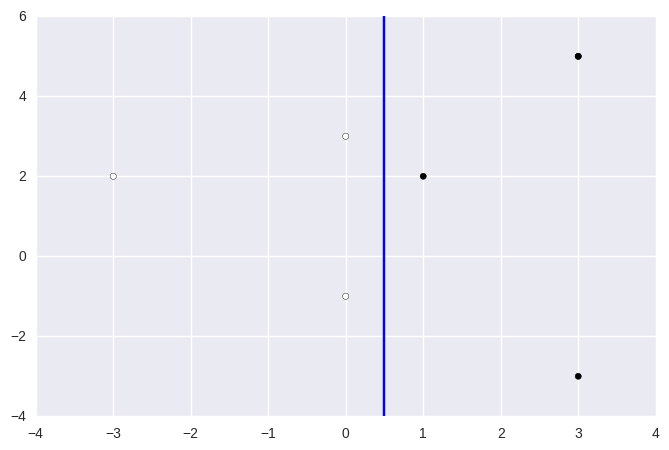

In [34]:
using PyCall,PyPlot
@pyimport seaborn as sns

function question11b()
    X = [1 0; 0 1; 0 -1; -1 0; 0 2; 0 -2; -2 0]
    Z = mapslices(x-> [x[2]^2 - 2*x[1] - 1, x[1]^2 - 2*x[2] + 1], X, 2)
    Y = [-1, -1, -1, 1, 1, 1, 1]
    data = [Z Y]
    
    fig = figure(figsize=(8,5))
    scatter(data[:,1], data[:,2], c=data[:,3])
    axvline(x=0.5)
    grid("on")
end
question11b()

### 12.
Consider the same training set of the previous problem, but instead of explicitly
transforming the input space $\mathcal{X}$, apply the hard-margin SVM algorithm with
the kernel
$$K(\mathbf{x}, \mathbf{x}') = (1 + \mathbf{x}^\intercal \mathbf{x}')^2$$
(which corresponds to a second-order polynomial transformation). Set up the
expression for $\mathcal{L}(\alpha_1, \ldots, \alpha_7)$ and solve for the optimal
$\alpha_1,\ldots ,\alpha_7$ (numerically, using a quadratic programming package).
The number of support vectors you get is in what range?

[a] 0-1

[b] 2-3

[c] 4-5

[d] 6-7

[e] >7

In [2]:
using ScikitLearn
@sk_import svm: SVC

function question12()
    X = [1 0; 0 1; 0 -1; -1 0; 0 2; 0 -2; -2 0]
    Y = [-1, -1, -1, 1, 1, 1, 1]
    clf = SVC(C=Inf, kernel="poly", degree=2, gamma=1.0, coef0=1.0)
    fit!(clf, X, Y)
    println("# of sv: ", length(clf[:support_]))
end
question12()

# of sv: 5


## Radial Basis Functions

We experiment with the RBF model, both in regular form (Lloyd + pseudo-inverse)
with $K$ centers:
$$\mathrm{sign}\left( \sum_{k=1}^K w_k \exp (-\gamma \|\mathbf{x} - \mu_k \|^2) + b\right)$$
(notice that there is a bias term), and in kernel form (using the RBF kernel in hard-margin SVM):
$$\mathrm{sign}\left( \sum_{\alpha_n>0} \alpha_n y_n \exp (-\gamma \|\mathbf{x} - \mathbf{x}_n \|^2) + b\right)$$

The input space is $\mathcal{X} = [−1,1]\times [−1,1]$ with uniform probability distribution, and
the target is
$$f(\mathbf{x}) = \mathrm{sign}(x_2 - x_1 + 0.25 \sin(\pi x_1)$$
which is slightly nonlinear in the $\mathcal{X}$ space. In each run, generate $100$ training points
at random using this target, and apply both forms of RBF to these training points.

Here are some guidelines:
* Repeat the experiment for as many runs as needed to get the answer to be stable
(statistically away from flipping to the closest competing answer).
* In case a data set is not separable in the '$\mathcal{Z}$ space' by the RBF kernel using hard-margin SVM,
discard the run but keep track of how often this happens, if ever.
* When you use Lloyd’s algorithm, initialize the centers to random points in X and
iterate until there is no change from iteration to iteration. If a cluster becomes empty,
discard the run and repeat.

### 13.
For $\gamma= 1.5$, how often do you get a data set that is not separable by the RBF
kernel (using hard-margin SVM)? *Hint: Run the hard-margin SVM, then check
that the solution has* $E_\mathrm{in} = 0$.

[a] $\leq 5\%$ of the time

[b] $> 5\%$ but $\leq 10\%$ of the time

[c] $> 10\%$ but $\leq 20\%$ of the time

[d] $> 20\%$ but $\leq 40\%$ of the time

[e] $> 40\%$ of the time

In [15]:
function gen_dataset(num_points, targ_func)
    points = (2.0*rand((num_points,2)) - 1.0)
    labels = targ_func(points)
    return points, labels
end

target_function = x -> sign(x[:,2] - x[:,1] + 0.25*sin(π*x[:,1]))

(anonymous function)

In [16]:
using ScikitLearn
@sk_import svm: SVC

function question13()
    points, labels = gen_dataset(100, target_function)
    cnt = 0
    for _ in 1:1000
        clf = SVC(C=Inf, kernel="rbf", gamma=1.5)
        fit!(clf, points, labels)
        ein = 1 - score(clf, points, labels)
        if ein > 0.0
            cnt += 1
        end
    end
    cnt / length(labels)
end
question13()

0.0

### 14.
If we use $K = 9$ for regular RBF and take $\gamma = 1.5$, how often does the kernel
form beat the regular form (excluding runs mentioned in Problem 13 and runs
with empty clusters, if any) in terms of $E_\mathrm{out}$?

[a] $\leq 15\%$ of the time

[b] $> 15\%$ but $\leq 30\%$ of the time

[c] $> 30\%$ but $\leq 50\%$ of the time

[d] $> 50\%$ but $\leq 75\%$ of the time

[e] $> 75\%$ of the time

### 15.
If we use $K = 12$ for regular RBF and take $\gamma = 1.5$, how often does the kernel
form beat the regular form (excluding runs mentioned in Problem 13 and runs
with empty clusters, if any) in terms of $E_\mathrm{out}$?

[a] $\leq 10\%$ of the time

[b] $> 10\%$ but $\leq 30\%$ of the time

[c] $> 30\%$ but $\leq 60\%$ of the time

[d] $> 60\%$ but $\leq 90\%$ of the time

[e] $> 90\%$ of the time

In [17]:
# kmeans wit hLloyd's algorithm
# initial cluster centers are randomly chosen
# returns cluster centers and whther empty
function kmeans(points, k)
    num_points = size(points,1)
    toCluster = zeros(Int64,num_points)
    toCluster_old = toCluster[:]
    has_empty = false
    
    # random initial cluster center
    mus = (2.0*rand((k,2)) - 1.0)
    
    while true
        # assign each point to the nearest cluster
        for i in 1:num_points
            min_dist = Inf
            min_idx = -1
            for j in 1:k
                dist = norm(points[i] - mus[j])
                if dist < min_dist
                    min_dist = dist
                    min_idx = j
                end
            end
            toCluster[i] = min_idx
        end

        # check whether cluster is changed
        toCluster == toCluster_old || break
        
        # update mus
        for i in 1:k
            mus[i] = mean(points[(toCluster .== i),:],1)
        end
        
    end
    
    #check empty clusters
    for i in 1:k
        #summary[i] = sum(toCluster .== i)
        if sum(toCluster .== i) == 0
            has_empty = true
            break
        end
    end
    mus, has_empty
end

# label with regular rbf
function eval_rbf(x, w, mu; gamma=gamma)
    num_clusters = size(mu,1)
    val = w[1]
    for i in 1:num_clusters
        val += w[i+1] * exp(-gamma * norm(x - mu[i,:])^2)
    end
    sign(val)
end

eval_rbf (generic function with 1 method)

In [18]:
function question14_15(num_clusters=9, num_iterations=100)
    svmwin = 0
    for _ in 1:num_iterations
        num_points = 100
        num_test_points = 10000
        #num_clusters = 9
        gamma = 1.5

        points, labels = gen_dataset(num_points, target_function)

        # rbf model
        mus, has_empty = kmeans(points, num_clusters)
        while has_empty
            mus, has_empty = kmeans(points, num_clusters)
        end

        ## Phi matrix
        Phi = zeros(num_points, num_clusters)
        for i in 1:num_points, j in 1:num_clusters
            Phi[i, j] = exp(-gamma * norm(points[i,:] - mus[j,:])^2)
        end

        ## adjust for bias term
        Phi = [ones(num_points) Phi]

        weights = pinv(Phi' * Phi) * Phi' * labels

        # svm model
        clf = SVC(C=Inf, kernel="rbf", gamma=1.5)
        fit!(clf, points, labels)

        # prepare new dataset for test
        t_points, t_labels = gen_dataset(num_test_points, target_function)

        eout_rbf = sum([eval_rbf(t_points[i,:], weights, mus, gamma=gamma) != t_labels[i] for i in 1:num_test_points])/num_test_points
        eout_svm = 1 - score(clf, t_points, t_labels)
        
        if eout_rbf > eout_svm
            svmwin += 1
        end
    end
    svmwin/num_iterations
end

question14_15 (generic function with 3 methods)

In [20]:
question14_15(9, 100)

0.87

In [22]:
question14_15(12, 100)

0.79

### 16.
Now we focus on regular RBF only, with $\gamma = 1.5$. If we go from $K = 9$ clusters
to $K = 12$ clusters (only 9 and 12), which of the following 5 cases happens most
often in your runs (excluding runs with empty clusters, if any)? Up or down
means strictly so.

[a] $E_\mathrm{in}$ goes down, but $E_\mathrm{out}$ goes up.

[b] $E_\mathrm{in}$ goes up, but $E_\mathrm{out}$ goes down.

[c] Both $E_\mathrm{in}$ and $E_\mathrm{out}$ go up.

[d] Both $E_\mathrm{in}$ and $E_\mathrm{out}$ go down.

[e] $E_\mathrm{in}$ and $E_\mathrm{out}$ remain the same.

In [33]:
function question16(num_iterations=100)
    ans = zeros(Int64, 5)

    for _ in 1:num_iterations
        num_points = 100
        num_test_points = 10000
        #num_clusters = 9
        gamma = 1.5
        
        ein = []
        eout = []
        
        points, labels = gen_dataset(num_points, target_function)

        for num_clusters in [9 12]
            mus, has_empty = kmeans(points, num_clusters)
            while has_empty
                mus, has_empty = kmeans(points, num_clusters)
            end

            ## Phi matrix
            Phi = zeros(num_points, num_clusters)
            for i in 1:num_points, j in 1:num_clusters
                Phi[i, j] = exp(-gamma * norm(points[i,:] - mus[j,:])^2)
            end

            ## adjust for bias term
            Phi = [ones(num_points) Phi]

            weights = pinv(Phi' * Phi) * Phi' * labels
            
            push!(ein, sum([eval_rbf(points[i,:], weights, mus, gamma=gamma)!= 
                labels[i] for i in 1:num_points])/num_points)
            # prepare new dataset for test
            t_points, t_labels = gen_dataset(num_test_points, target_function)

            push!(eout, sum([eval_rbf(t_points[i,:], weights, mus, gamma=gamma)!= 
                t_labels[i] for i in 1:num_test_points])/num_test_points)
        end
        if ein[1] > ein[2] && eout[1] < eout[2]
            ans[1] += 1
        elseif ein[1] < ein[2] && eout[1] > eout[2]
            ans[2] += 1
        elseif ein[1] < ein[2] && eout[1] < eout[2]
            ans[3] += 1
        elseif ein[1] > ein[2] && eout[1] > eout[2]
            ans[4] += 1
        else
            ans[5] += 1
        end
    end
    ans
end
question16()

5-element Array{Int64,1}:
 17
 10
 17
 42
 14

### 17.
For regular RBF with $K = 9$, if we go from $\gamma = 1.5$ to $\gamma = 2$ (only $1.5$ and $2$),
which of the following $5$ cases happens most often in your runs (excluding runs
with empty clusters, if any)? Up or down means strictly so.

[a] $E_\mathrm{in}$ goes down, but $E_\mathrm{out}$ goes up.

[b] $E_\mathrm{in}$ goes up, but $E_\mathrm{out}$ goes down.

[c] Both $E_\mathrm{in}$ and $E_\mathrm{out}$ go up.

[d] Both $E_\mathrm{in}$ and $E_\mathrm{out}$ go down.

[e] $E_\mathrm{in}$ and $E_\mathrm{out}$ remain the same.

In [34]:
function question17(num_iterations=100)
    ans = zeros(Int64, 5)

    for _ in 1:num_iterations
        num_points = 100
        num_test_points = 10000
        num_clusters = 9
        #gamma = 1.5
        
        ein = []
        eout = []
        
        points, labels = gen_dataset(num_points, target_function)

        for gamma in [1.5 2.0]
            mus, has_empty = kmeans(points, num_clusters)
            while has_empty
                mus, has_empty = kmeans(points, num_clusters)
            end

            ## Phi matrix
            Phi = zeros(num_points, num_clusters)
            for i in 1:num_points, j in 1:num_clusters
                Phi[i, j] = exp(-gamma * norm(points[i,:] - mus[j,:])^2)
            end

            ## adjust for bias term
            Phi = [ones(num_points) Phi]

            weights = pinv(Phi' * Phi) * Phi' * labels
            
            push!(ein, sum([eval_rbf(points[i,:], weights, mus, gamma=gamma)!= 
                labels[i] for i in 1:num_points])/num_points)
            # prepare new dataset for test
            t_points, t_labels = gen_dataset(num_test_points, target_function)

            push!(eout, sum([eval_rbf(t_points[i,:], weights, mus, gamma=gamma)!= 
                t_labels[i] for i in 1:num_test_points])/num_test_points)
        end
        if ein[1] > ein[2] && eout[1] < eout[2]
            ans[1] += 1
        elseif ein[1] < ein[2] && eout[1] > eout[2]
            ans[2] += 1
        elseif ein[1] < ein[2] && eout[1] < eout[2]
            ans[3] += 1
        elseif ein[1] > ein[2] && eout[1] > eout[2]
            ans[4] += 1
        else
            ans[5] += 1
        end
    end
    ans
end
question17()

5-element Array{Int64,1}:
 10
  7
 43
 27
 13

### 18.
What is the percentage of time that regular RBF achieves $E_\mathrm{in} = 0$ with $K = 9$
and $\gamma = 1.5$ (excluding runs with empty clusters, if any)?

[a] $\leq 10\%$ of the time

[b] $> 10\%$ but $\leq 20\%$ of the time

[c] $> 20\%$ but $\leq 30\%$ of the time

[d] $> 30\%$ but $\leq 50\%$ of the time

[e] $> 50\%$ of the time

In [35]:
function question18(num_iterations=100)
    cnt = 0

    for _ in 1:num_iterations
        num_points = 100
        num_test_points = 10000
        num_clusters = 9
        gamma = 1.5
        
        points, labels = gen_dataset(num_points, target_function)

        mus, has_empty = kmeans(points, num_clusters)
        while has_empty
            mus, has_empty = kmeans(points, num_clusters)
        end

        ## Phi matrix
        Phi = zeros(num_points, num_clusters)
        for i in 1:num_points, j in 1:num_clusters
            Phi[i, j] = exp(-gamma * norm(points[i,:] - mus[j,:])^2)
        end

        ## adjust for bias term
        Phi = [ones(num_points) Phi]

        weights = pinv(Phi' * Phi) * Phi' * labels

        if sum([eval_rbf(points[i,:], weights, mus, gamma=gamma)!= 
            labels[i] for i in 1:num_points]) == 0
            cnt += 1
        end
    end
    cnt / num_iterations
end

question18 (generic function with 2 methods)

In [36]:
question18()

0.04

## Bayesian Priors

### 19.
Let $f \in [0,1]$ be the unknown probability of getting a heart attack for people
in a certain population. Notice that $f$ is just a constant, not a function, for
simplicity. We want to model $f$ using a hypothesis $h \in [0,1]$. Before we see any
data, we assume that $P(h = f)$ is uniform over $h \in [0,1]$ (the prior). We pick
one person from the population, and it turns out that he or she had a heart
attack. Which of the following is true about the posterior probability that $h = f$
given this sample point?

[a] The posterior is uniform over $[0,1]$.

[b] The posterior increases linearly over $[0,1]$.

[c] The posterior increases nonlinearly over $[0,1]$.

[d] The posterior is a delta function at $1$ (implying $f$ has to be $1$).

[e] The posterior cannot be evaluated based on the given information.

The probability/likelihood:
$$P(\mbox{positive} \mid f) = f \hspace{2em} P(\mbox{negative} \mid f) = 1-f$$
The prior:
$$\pi(f) = 1 \hspace{1em} (0 \leq f \leq 1)$$
The posterior is
$$ \pi(f \mid \mbox{positive}) \propto P(\mbox{positive} \mid f) \times \pi(f) = f \times 1$$
From the condition that this is integrated to 1,
$$\pi(f \mid \mbox{positive}) = 2f$$

## Aggregation

### 20.
Given two learned hypotheses $g_1$ and $g_2$, we construct the aggregate hypothesis
$g$ given by $g(x) = \frac{1}{2}(g_1(\mathbf{x}) + g_2(\mathbf{x}))$ for all $\mathbf{x} \in \mathcal{X}$.
If we use mean-squared error, which of the following statements is true?

[a] $E_\mathrm{out}(g)$ cannot be worse than $E_\mathrm{out}(g_1)$.

[b] $E_\mathrm{out}(g)$ cannot be worse than the smaller of $E_\mathrm{out}(g_1)$ and $E_\mathrm{out}(g_2)$.

[c] $E_\mathrm{out}(g)$ cannot be worse than the average of $E_\mathrm{out}(g_1)$ and $E_\mathrm{out}(g_2)$.

[d] $E_\mathrm{out}(g)$ has to be between $E_\mathrm{out}(g_1)$ and $E_\mathrm{out}(g_2)$ (including the end values of that interval).

[e] None of the above

For random variables $a$ and $b$, we have $\mathbb{E}(a-b)^2 = \mathbb{E}a^2 + \mathbb{E}b^2 -2\mathbb{E}ab \geq 0$. So, -$\mathbb{E}ab \geq \frac{\mathbb{E}a^2+\mathbb{E}b^2}{2}$.

Taking $f$ as the true hyposethis, set $a = f(\mathbf{x})-g_1(\mathbf{x}), b = f(\mathbf{x}) - g_2(\mathbf{x})$. Then,

$$E_\mathrm{out}(g) -\frac{1}{2}(E_\mathrm{out}(g_1) + E_\mathrm{out}(g_2)) 
= -\frac{1}{2}\left[\mathbb{E}a^2 +\mathbb{E}b^2 -\mathbb{E}ab \right]$$

We know from the first inequality,
$$\mathbb{E}a^2 +\mathbb{E}b^2 -\mathbb{E}ab \geq \frac{1}{2}(\mathbb{E}a^2 + \mathbb{E}b^2) \geq 0$$
and find [c] is true.